<a href="https://colab.research.google.com/github/Towhid-Alam/Big-Data/blob/main/14_Feature_Engineering_Lab_Performance_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('C:/Users/Administrator/Downloads/ML/ML/Data/cars.csv')
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


# Null value handling

In [ ]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

# Ordinal Encoding

In [ ]:
df[['brand', 'fuel']]


,brand,fuel
0,Maruti,Diesel
1,Skoda,Diesel
2,Honda,Petrol
3,Hyundai,Diesel
4,Maruti,Petrol
...,...,...
8123,Hyundai,Petrol
8124,Hyundai,Diesel
8125,Maruti,Diesel
8126,Tata,Diesel


In [ ]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],['Diesel', 'Petrol', 'LPG', 'CNG']])
df[['brand', 'fuel']]= oe.fit_transform(df[['brand', 'fuel']])

In [ ]:
oe.categories_

[array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
        'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
        'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
        'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
        'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
       dtype=object),
 array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)]

In [ ]:
df[['brand', 'fuel']]

,brand,fuel
0,0.0,0.0
1,1.0,0.0
2,2.0,1.0
3,3.0,0.0
4,0.0,1.0
...,...,...
8123,3.0,1.0
8124,3.0,0.0
8125,0.0,0.0
8126,8.0,0.0


# One hot Encoding

In [ ]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [ ]:
#using dummy variable (pandas)
dummies= pd.get_dummies(df, columns = ['owner'])
dummies

,brand,km_driven,fuel,selling_price,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.0,145500,0.0,450000,1,0,0,0,0
1,1.0,120000,0.0,370000,0,0,1,0,0
2,2.0,140000,1.0,158000,0,0,0,0,1
3,3.0,127000,0.0,225000,1,0,0,0,0
4,0.0,120000,1.0,130000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8123,3.0,110000,1.0,320000,1,0,0,0,0
8124,3.0,119000,0.0,135000,0,1,0,0,0
8125,0.0,120000,0.0,382000,1,0,0,0,0
8126,8.0,25000,0.0,290000,1,0,0,0,0


In [ ]:
df

,brand,km_driven,fuel,owner,selling_price
0,0.0,145500,0.0,First Owner,450000
1,1.0,120000,0.0,Second Owner,370000
2,2.0,140000,1.0,Third Owner,158000
3,3.0,127000,0.0,First Owner,225000
4,0.0,120000,1.0,First Owner,130000
...,...,...,...,...,...
8123,3.0,110000,1.0,First Owner,320000
8124,3.0,119000,0.0,Fourth & Above Owner,135000
8125,0.0,120000,0.0,First Owner,382000
8126,8.0,25000,0.0,First Owner,290000


In [ ]:
df

,brand,km_driven,fuel,owner,selling_price
0,0.0,145500,0.0,First Owner,450000
1,1.0,120000,0.0,Second Owner,370000
2,2.0,140000,1.0,Third Owner,158000
3,3.0,127000,0.0,First Owner,225000
4,0.0,120000,1.0,First Owner,130000
...,...,...,...,...,...
8123,3.0,110000,1.0,First Owner,320000
8124,3.0,119000,0.0,Fourth & Above Owner,135000
8125,0.0,120000,0.0,First Owner,382000
8126,8.0,25000,0.0,First Owner,290000


In [ ]:
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
4293,2.0,50000,1.0,First Owner,750000
6294,3.0,56000,1.0,Second Owner,195000
157,0.0,46100,1.0,First Owner,599000
194,0.0,60000,1.0,Second Owner,459999
6167,19.0,20000,1.0,First Owner,5150000


In [ ]:
X= df.drop('owner', axis=1)
y= df['owner']

# Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((5689, 4), (2439, 4))

In [ ]:
#x' = (x- mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
scaler.mean_

array([4.73967305e+00, 6.99157710e+04, 4.76885217e-01, 6.45591706e+05])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

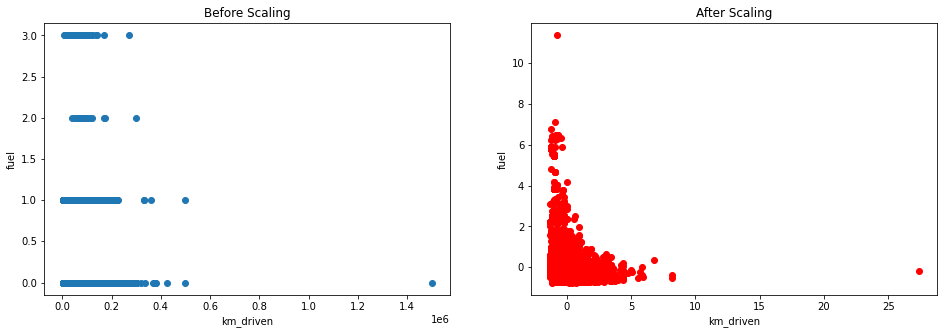

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['km_driven'], X_train['fuel'])
plt.xlabel('km_driven')
plt.ylabel('fuel')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['km_driven'], X_train_scaled['selling_price'],color='red')
plt.xlabel('km_driven')
plt.ylabel('fuel')
plt.title('After Scaling')


plt.show()

# Outlier

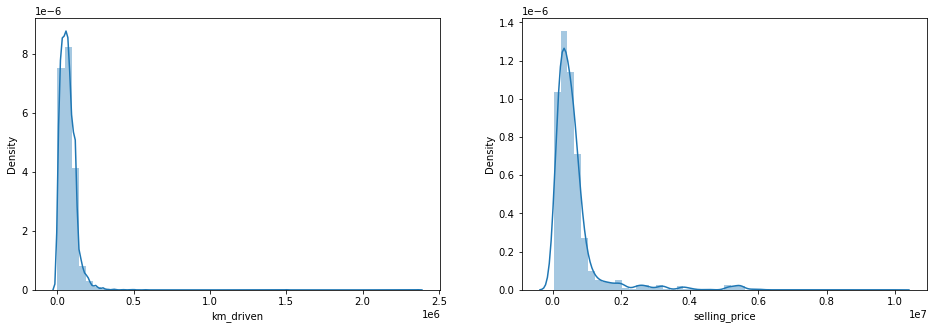

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['km_driven'])

plt.subplot(1,2,2)
sns.distplot(df['selling_price'])

plt.show()

# Outlier in Normal Distribution (km_driven)

In [ ]:
df['km_driven'].skew()

11.170909783549087

In [ ]:
print("Mean value of km_driven",df['km_driven'].mean())
print("Std value of km_driven",df['km_driven'].std())
print("Min value of km_driven",df['km_driven'].min())
print("Max value of km_driven",df['km_driven'].max())

Mean value of km_driven 69819.51082677166
Std value of km_driven 56550.554958218585
Min value of km_driven 1
Max value of km_driven 2360457


In [ ]:
upper_limit= df['km_driven'].mean() + 3*df['km_driven'].std()
lower_limit= df['km_driven'].mean() - 3*df['km_driven'].std()

In [ ]:
outlier = df[(df['km_driven'] > upper_limit) | (df['km_driven'] < lower_limit)]
outlier

,brand,km_driven,fuel,owner,selling_price
394,4.0,240000,0.0,Third Owner,250000
401,8.0,265000,0.0,Second Owner,95000
461,4.0,250000,0.0,First Owner,730000
886,7.0,300000,0.0,Third Owner,320000
998,0.0,360003,1.0,Second Owner,220000
...,...,...,...,...,...
7645,8.0,250000,0.0,Second Owner,110000
7945,4.0,250000,0.0,First Owner,730000
7969,4.0,250000,0.0,First Owner,730000
8030,8.0,300000,0.0,First Owner,275000


In [ ]:
# Removing outlier
new_df = df[(df['km_driven'] < upper_limit) & (df['km_driven'] > lower_limit)]
new_df.shape

(8056, 5)

In [ ]:
df['km_driven_zscore'] = (df['km_driven'] - df['km_driven'].mean())/df['km_driven'].std()

In [ ]:
outlier = df[(df['km_driven_zscore'] > 3) | (df['km_driven_zscore'] < -3)]
outlier

,brand,km_driven,fuel,owner,selling_price,km_driven_zscore
394,4.0,240000,0.0,Third Owner,250000,3.009351
401,8.0,265000,0.0,Second Owner,95000,3.451434
461,4.0,250000,0.0,First Owner,730000,3.186184
886,7.0,300000,0.0,Third Owner,320000,4.070349
998,0.0,360003,1.0,Second Owner,220000,5.131399
...,...,...,...,...,...,...
7645,8.0,250000,0.0,Second Owner,110000,3.186184
7945,4.0,250000,0.0,First Owner,730000,3.186184
7969,4.0,250000,0.0,First Owner,730000,3.186184
8030,8.0,300000,0.0,First Owner,275000,4.070349


In [ ]:
new_df1 = df[(df['km_driven_zscore'] < 3 ) & (df['km_driven_zscore'] > -3)]
new_df1.shape

(8056, 6)

<AxesSubplot:xlabel='km_driven'>

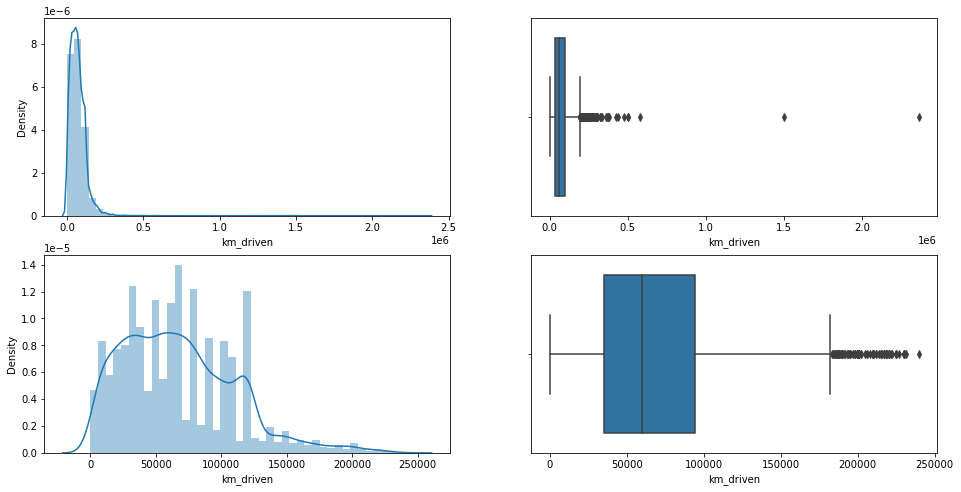

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['km_driven'])

plt.subplot(2,2,2)
sns.boxplot(df['km_driven'])

plt.subplot(2,2,3)
sns.distplot(new_df1['km_driven'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['km_driven'])

In [ ]:
import scipy.stats as stats

# PDF and QQ plot

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
#Function transformation (Log Transform)
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
X_train_transformed= trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)
#with log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train)
y_pred= clf.predict(X_test_transformed)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.6662566625666256


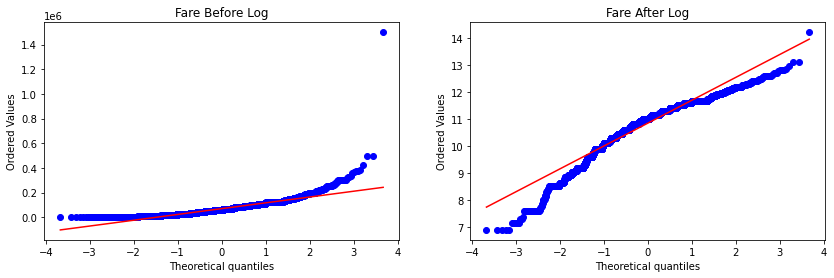

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['km_driven'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['km_driven'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()


# box-cox

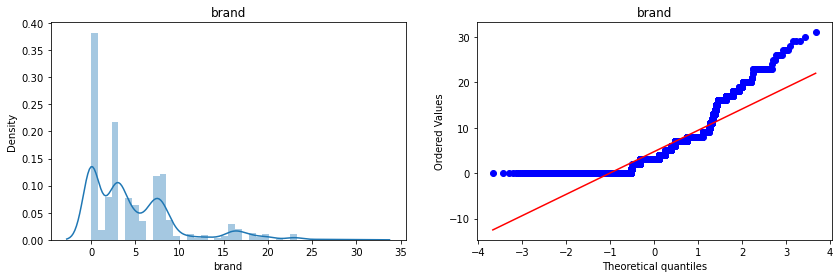

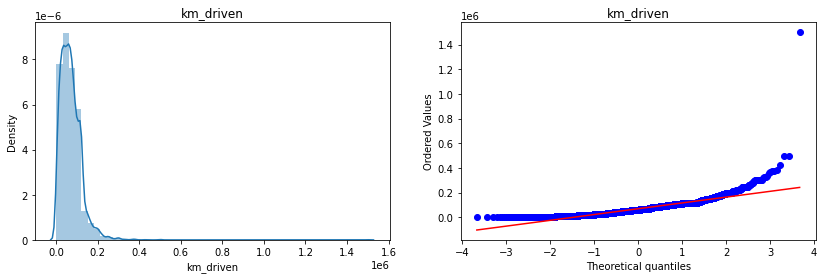

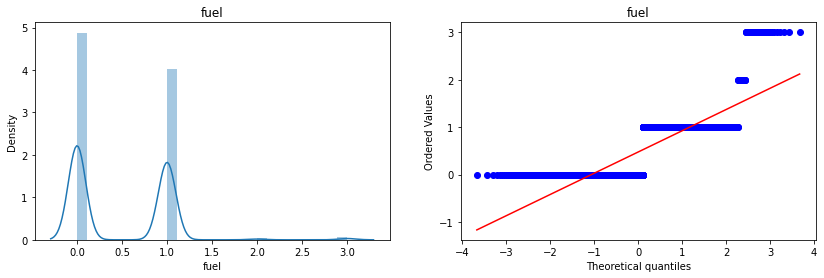

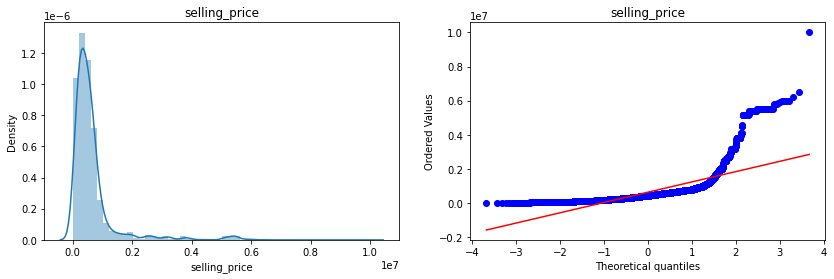

In [ ]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train_scaled+ 0.00001 )
X_test_transformed = pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})



,cols,box_cox_lambdas
0,brand,-0.016376
1,km_driven,0.275529
2,fuel,0.345177
3,selling_price,-0.931673


In [ ]:
# Applying linear regression on transformed data
lr1 = LinearRegression()
lr1.fit(X_train_transformed,y_train)
y_pred2 = lr1.predict(X_test_transformed)
r2_score(y_test,y_pred2)

ValueError: could not convert string to float: 'First Owner'